In [1]:
data=[{'grade':85,'brother':4,'lecture':'mat'},
     {'grade':70,'brother':3,'lecture':'eng'},
     {'grade':65,'brother':3,'lecture':'mat'},
     {'grade':60,'brother':2,'lecture':'phy'}]

In [2]:
from sklearn.feature_extraction import DictVectorizer

In [3]:
vec = DictVectorizer(sparse=False,dtype=int)

In [6]:
vec.fit_transform(data)

array([[ 4, 85,  0,  1,  0],
       [ 3, 70,  1,  0,  0],
       [ 3, 65,  0,  1,  0],
       [ 2, 60,  0,  0,  1]])

In [7]:
vec.get_feature_names()

['brother', 'grade', 'lecture=eng', 'lecture=mat', 'lecture=phy']

In [8]:
vec=DictVectorizer(sparse=True,dtype=int)
vec.fit_transform(data)

<4x5 sparse matrix of type '<class 'numpy.int64'>'
	with 12 stored elements in Compressed Sparse Row format>

In [9]:
data = ['hava iyi','iyi insan','hava bozuk']

In [10]:
from sklearn.feature_extraction.text import CountVectorizer

In [11]:
vec = CountVectorizer()

In [12]:
X = vec.fit_transform(data)
X

<3x4 sparse matrix of type '<class 'numpy.int64'>'
	with 6 stored elements in Compressed Sparse Row format>

In [13]:
import pandas as pd

In [15]:
pd.DataFrame(X.toarray(),columns=vec.get_feature_names())

,bozuk,hava,insan,iyi
0,0,1,0,1
1,0,0,1,1
2,1,1,0,0


In [16]:
import numpy as np
import matplotlib.pyplot as plt

In [31]:
x = np.arange(5)
y = np.random.randint(5, size=5)

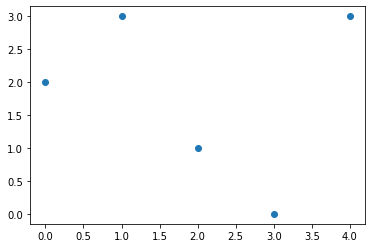

In [32]:
plt.scatter(x,y)

In [33]:
from sklearn.linear_model import LinearRegression

In [34]:
X=x[:,np.newaxis]

In [35]:
model=LinearRegression().fit(X,y)

In [36]:
y_fit=model.predict(X)

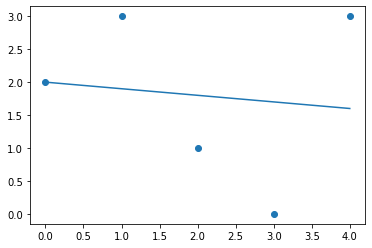

In [37]:
plt.scatter(x,y)
plt.plot(x,y_fit)

In [38]:
from sklearn.preprocessing import PolynomialFeatures

In [39]:
pol = PolynomialFeatures(degree=3,include_bias=False)

In [40]:
X2=pol.fit_transform(X)
X2

array([[ 0.,  0.,  0.],
       [ 1.,  1.,  1.],
       [ 2.,  4.,  8.],
       [ 3.,  9., 27.],
       [ 4., 16., 64.]])

In [41]:
model = LinearRegression().fit(X2,y)

In [42]:
y_fit = model.predict(X2)

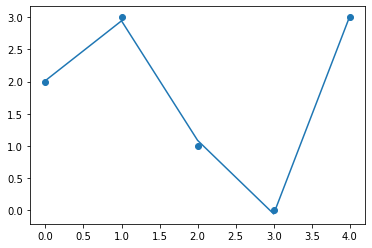

In [43]:
plt.scatter(x,y)
plt.plot(x,y_fit)

In [69]:
from numpy import nan


#A = np.random.randint(10,80, size=(5,2))
#
#A = A * 1.0
#
#n = 3
#
#index = np.random.choice(A.size, n, replace=False)
#
#A.ravel()[index] = np.nan
#
#print(A)

In [79]:
X = np.random.randint(0,10,size=(5,3))
X = X*1.0
X[0][1] = nan
X[3][2] = nan
X

array([[ 8., nan,  4.],
       [ 1.,  9.,  2.],
       [ 5.,  6.,  2.],
       [ 7.,  0., nan],
       [ 4.,  4.,  3.]])

In [80]:
y=np.random.randint(-6,13,5)
y

array([ 9,  6,  8,  3, -2])

In [84]:
from sklearn.impute import SimpleImputer
imp = SimpleImputer(strategy='mean')

In [85]:
X2=imp.fit_transform(X)

In [86]:
X2

array([[8.  , 4.75, 4.  ],
       [1.  , 9.  , 2.  ],
       [5.  , 6.  , 2.  ],
       [7.  , 0.  , 2.75],
       [4.  , 4.  , 3.  ]])

In [87]:
model = LinearRegression().fit(X2,y)
model.predict(X2)

array([8.47790894, 4.39021922, 9.43575042, 1.60775717, 0.08836425])

In [88]:
from sklearn.pipeline import make_pipeline

In [89]:
model=make_pipeline(SimpleImputer(strategy='mean'),
                   PolynomialFeatures(degree=2),
                   LinearRegression())

In [94]:
model.fit(X,y)
print(y)
print(model.predict(X))

[ 9  6  8  3 -2]
[ 9.  6.  8.  3. -2.]
